# Case study on Supervised learning

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import mean_squared_error,r2_score,f1_score,confusion_matrix,precision_score,recall_score,accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# 1. Read the dataset to the python environment

In [116]:
df =pd.read_excel('irisml.xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Do necessary pre-processing steps.

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [118]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [119]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [120]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [121]:
df["SL"].fillna(df['SL'].median(), inplace = True)

In [122]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [123]:
df["SW"].fillna(df['SW'].median(), inplace = True)

In [124]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [125]:
df["PL"].fillna(df['PL'].median(), inplace = True)

In [126]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [127]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [128]:
df['Classification'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Classification, dtype: int64

# Label Encoding

In [129]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
a = ['Classification']
for i in np.arange(len(a)):
     df[a[i]] = label_en.fit_transform(df[a[i]])

In [130]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


Category variable converted to Numerical variable

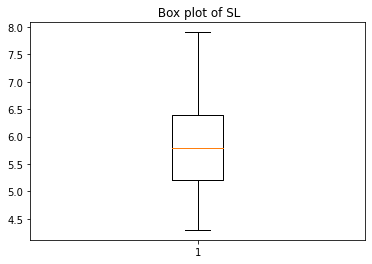

In [132]:
plt.boxplot(df['SL'])
plt.title(' Box plot of SL');

No outliers in SL

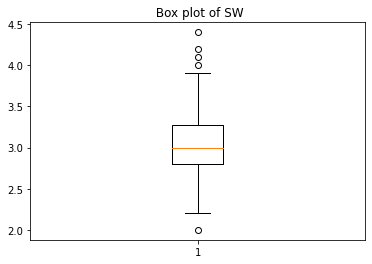

In [100]:
plt.boxplot(df['SW'])
plt.title(' Box plot of SW');

Outliers present in SW

In [135]:
q1=np.percentile(df['SW'],25,interpolation='midpoint')
q2=np.percentile(df['SW'],50,interpolation='midpoint')
q3=np.percentile(df['SW'],75,interpolation='midpoint')
print(q1,q2,q3)

2.8 3.0 3.25


In [136]:
iqr = q3 - q1

In [137]:
q_limit = 1.5 * iqr

In [138]:
upper_limit = q3 + q_limit
lower_limit = q1 - q_limit

In [139]:
# Dropping the outliers from the dataset
print('The upper limit for SW is: ' ,upper_limit)
print('\nThe lower limit for SW is: ', lower_limit)

The upper limit for SW is:  3.9250000000000003

The lower limit for SW is:  2.1249999999999996


In [140]:
df.loc[(df['SW'] < lower_limit) ^ (df['SW'] > upper_limit)]

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,0
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


In [141]:
df.drop(index = df.loc[(df['SW'] < lower_limit) ^ (df['SW'] > upper_limit)].index, inplace = True)

In [142]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


Text(0.5, 1.0, 'Box plot of SW')

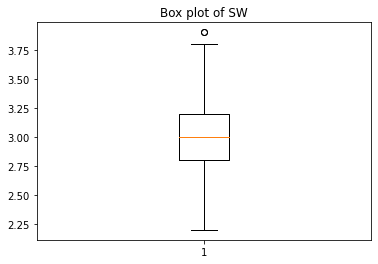

In [150]:
plt.boxplot(df['SW'])
plt.title('Box plot of SW')

Removed outliers

Text(0.5, 1.0, 'Box plot of PL')

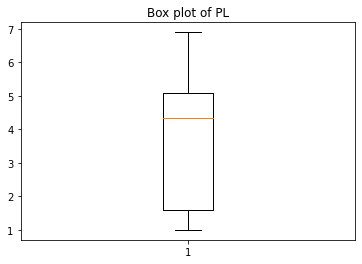

In [143]:
plt.boxplot(df['PL'])
plt.title('Box plot of PL')

No outliers in PL

Text(0.5, 1.0, 'Box plot of PW')

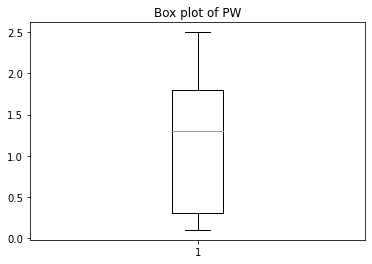

In [144]:
plt.boxplot(df['PW'])
plt.title('Box plot of PW')

No outliers in PW

In [145]:
df['Classification'].value_counts()

2    50
1    49
0    46
Name: Classification, dtype: int64

<AxesSubplot:>

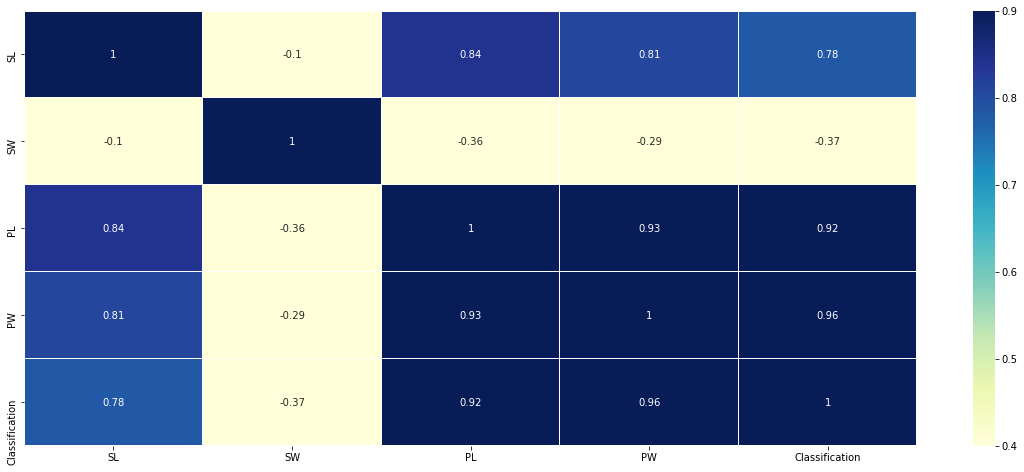

In [146]:
corrmatrix = df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [147]:
y = df['Classification']
x = df.drop('Classification', axis=1)
x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


# Min-Max Scaling

In [148]:
from sklearn import preprocessing
# Min-Max Scaling :

min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.435441,0.484381,0.482642,0.469540
std,0.226896,0.220208,0.290214,0.315925
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.352941,0.101695,0.083333
50%,0.416667,0.470588,0.567797,0.500000
75%,0.583333,0.588235,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [21]:
df['Classification'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 150, dtype: object>

In [22]:
from sklearn.preprocessing import LabelEncoder
lab_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    y[a[i]]=lab_en.fit_transform(y[a[i]])

KeyError: 'Classification'

In [23]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
import pandas as pd

In [25]:
pd.get_dummies(df.Classification)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy on Random Forest model is : ', accuracy_score(y_test, y_pred))

Accuracy on Random Forest model is :  0.9310344827586207


Here, the accuracy of Random Forest model is 93.1%

In [155]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [156]:
model_params = {
    'SVM' : {
        'model' : svm.SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['rbf', 'linear']
        }
    },
    'Random_Forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'Logistic_Regression' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'C' : [1,5,10]
        }
    }, 
    'Decision_Tree' : {
        'model' : DecisionTreeClassifier(random_state=42),
        'params' : {
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]
        }
    },
    'kNN' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']
        }
    }
}

In [157]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
df1 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df1 = df1.style.set_properties(subset=['best_params'], **{'width-min': '300px'})
df1

,model,best_score,best_params
0,SVM,0.974275,"{'C': 1, 'kernel': 'linear'}"
1,Random_Forest,0.974638,{'n_estimators': 10}
2,Logistic_Regression,0.931522,{'C': 10}
3,Decision_Tree,0.957246,"{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}"
4,kNN,0.991667,"{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}"


In [158]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

In [159]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [160]:
clf.best_score_

0.9916666666666668

In [161]:
clf.best_params_

{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}

Here, we can see that the kNN model gives the best score when compared to the other models. The best_score provided by kNN is 99.16%

# Thank You!